# Pengenalan

**Neural Style Transfer** adalah teknik memasukkan style gambar ke dalam gambar yang lain. Neural Style Transfer menggunakan 2 gambar: *content image* (foto yang ingin dimanipulasi) dan *style-reference image* (filter gaya gambarnya, contohnya lukisan Van Gogh). Dengan demikian, kita bisa memanipulasi gambar hingga terlihat seperti lukisan 

Dalam *notebook* ini, kita akan menggunakan Fast Style Transfer dengan **Tensor Flow Hub Model (TF-hub)**, yaitu function siap pakai untuk melakukan style transfer secara cepat.

Aplikasi ini akan dideploy di Heroku.

# Library Set Up

In [1]:
#import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import tensorflow_hub as hub

import os
import tensorflow as tf

# Load compressed models from tensorflow_hub
#os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

# Membuat function

In [2]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

# Download images

In [3]:
content_path = tf.keras.utils.get_file('lucinta.jpg', 'https://thumb.viva.co.id/media/frontend/thumbs3/2021/05/03/608fbebb52d12-lucinta-luna_665_374.jpg')
style_path = tf.keras.utils.get_file('tradi.jpg','https://previews.123rf.com/images/wangdu88/wangdu881908/wangdu88190800282/128837608-flower-and-bird-traditional-chinese-painting.jpg')

155648/153896 [==============================] - 0s 1us/step


# Visualisasi content dan style image

In [4]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

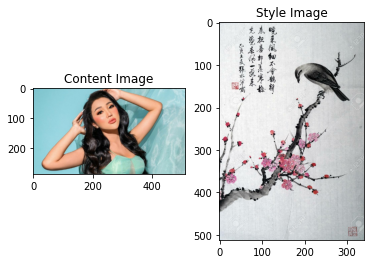

In [5]:
# Create function to display images

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

# display the image

content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

# Fast File Transfer dengan TF Hub

In [ ]:
# import tensorflow_hub as hub
# hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
#stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
#tensor_to_image(stylized_image)

In [6]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)
newImage = tensor_to_image(stylized_image)



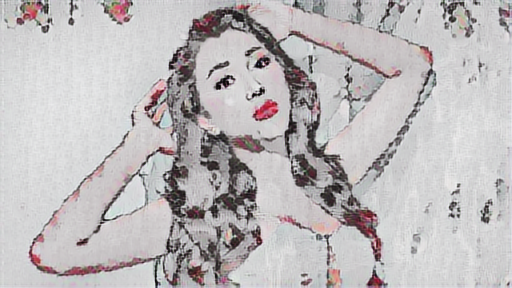

In [7]:
newImage